## 01wk-2 : xxxx

## 1. imports

In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## 2. 회귀모형

### A. 아이스 아메리카노

`-` 카페주인인 박혜원씨는 온도와 아이스아메리카노 판매량이 관계가 있다는
것을 알았다. 구체적으로는

> “온도가 높아질 수록 (=날씨가 더울수록) 아이스아메리카노의 판매량이
> 증가”

한다는 사실을 알게 되었다. 이를 확인하기 위해서 아래와 같이 100개의
데이터를 모았다.

In [1]:
temp = [-2.4821, -2.3621, -1.9973, -1.6239, -1.4792, -1.4635, -1.4509, -1.4435,
        -1.3722, -1.3079, -1.1904, -1.1092, -1.1054, -1.0875, -0.9469, -0.9319,
        -0.8643, -0.7858, -0.7549, -0.7421, -0.6948, -0.6103, -0.5830, -0.5621,
        -0.5506, -0.5058, -0.4806, -0.4738, -0.4710, -0.4676, -0.3874, -0.3719,
        -0.3688, -0.3159, -0.2775, -0.2772, -0.2734, -0.2721, -0.2668, -0.2155,
        -0.2000, -0.1816, -0.1708, -0.1565, -0.1448, -0.1361, -0.1057, -0.0603,
        -0.0559, -0.0214,  0.0655,  0.0684,  0.1195,  0.1420,  0.1521,  0.1568,
         0.2646,  0.2656,  0.3157,  0.3220,  0.3461,  0.3984,  0.4190,  0.5443,
         0.5579,  0.5913,  0.6148,  0.6469,  0.6469,  0.6523,  0.6674,  0.7059,
         0.7141,  0.7822,  0.8154,  0.8668,  0.9291,  0.9804,  0.9853,  0.9941,
         1.0376,  1.0393,  1.0697,  1.1024,  1.1126,  1.1532,  1.2289,  1.3403,
         1.3494,  1.4279,  1.4994,  1.5031,  1.5437,  1.6789,  2.0832,  2.2444,
         2.3935,  2.6056,  2.6057,  2.6632]

In [2]:
sales= [-8.5420, -6.5767, -5.9496, -4.4794, -4.2516, -3.1326, -4.0239, -4.1862,
        -3.3403, -2.2027, -2.0262, -2.5619, -1.3353, -2.0466, -0.4664, -1.3513,
        -1.6472, -0.1089, -0.3071, -0.6299, -0.0438,  0.4163,  0.4166, -0.0943,
         0.2662,  0.4591,  0.8905,  0.8998,  0.6314,  1.3845,  0.8085,  1.2594,
         1.1211,  1.9232,  1.0619,  1.3552,  2.1161,  1.1437,  1.6245,  1.7639,
         1.6022,  1.7465,  0.9830,  1.7824,  2.1116,  2.8621,  2.1165,  1.5226,
         2.5572,  2.8361,  3.3956,  2.0679,  2.8140,  3.4852,  3.6059,  2.5966,
         2.8854,  3.9173,  3.6527,  4.1029,  4.3125,  3.4026,  3.2180,  4.5686,
         4.3772,  4.3075,  4.4895,  4.4827,  5.3170,  5.4987,  5.4632,  6.0328,
         5.2842,  5.0539,  5.4538,  6.0337,  5.7250,  5.7587,  6.2020,  6.5992,
         6.4621,  6.5140,  6.6846,  7.3497,  8.0909,  7.0794,  6.8667,  7.4229,
         7.2544,  7.1967,  9.5006,  9.0339,  7.4887,  9.0759, 11.0946, 10.3260,
        12.2665, 13.0983, 12.5468, 13.8340]

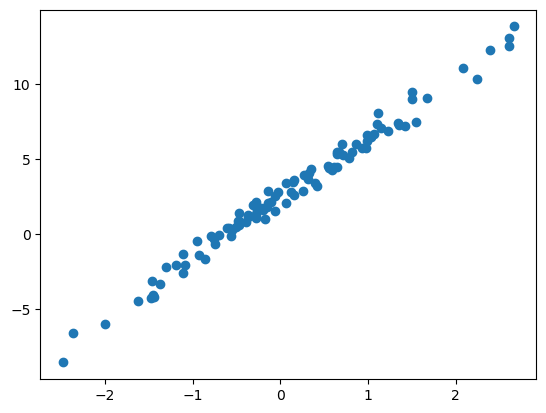

In [6]:
plt.plot(temp,sales,'o')
plt.show()

> 대체로 기온이 높을수록 판매량이 늘어난다.

### B. 가짜자료를 만든 방법

`-` 방법 1 : $y_i = w_0 + w_1 x_i + \epsilon_i = 2.5 + 4x_i + \epsilon_i, ~ i = 1, 2, \cdots, n$

In [30]:
torch.manual_seed(43052)
x, _ = torch.randn(100).sort() ## temperture, 자체 메소드로 sort 시, 인덱스를 반환함
eps = torch.randn(100)*0.5
y = 2.5 + 4*x + eps ## sales

In [ ]:
x[:5], y[:5] ## 오차항 첫번째 절대값이 엄청 크게 나옴;

(tensor([-2.4821, -2.3621, -1.9973, -1.6239, -1.4792]),
 tensor([-8.5420, -6.5767, -5.9496, -4.4794, -4.2516]))

In [25]:
temp[:5], sales[:5]

([-2.4821, -2.3621, -1.9973, -1.6239, -1.4792],
 [-8.542, -6.5767, -5.9496, -4.4794, -4.2516])

`-` 방법 2 : $\bf y = XW + \boldsymbol{\epsilon}$

* ${\bf y}=\begin{bmatrix} y_1 \\ y_2 \\ \dots \\ y_n\end{bmatrix}, \quad {\bf X}=\begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \dots \\ 1 & x_n\end{bmatrix}, \quad {\bf W}=\begin{bmatrix} 2.5 \\ 4 \end{bmatrix}, \quad \boldsymbol{\epsilon}= \begin{bmatrix} \epsilon_1 \\ \dots \\ \epsilon_n\end{bmatrix}$

> 행렬을 이용한 표현

In [37]:
X = torch.stack([torch.ones(100), x], axis = 1) ## 두 객체 모두 벡터이므로, 차원을 늘려야 함
Xs = X[:, [1]]
W = torch.tensor([[2.5],
                  [4]])
y = X@W + eps.reshape(-1, 1)

In [46]:
X[:5, :], y[:5, :]

(tensor([[ 1.0000, -2.4821],
         [ 1.0000, -2.3621],
         [ 1.0000, -1.9973],
         [ 1.0000, -1.6239],
         [ 1.0000, -1.4792]]),
 tensor([[-8.5420],
         [-6.5767],
         [-5.9496],
         [-4.4794],
         [-4.2516]]))

`-` True와 Observed data를 동시에 시각화

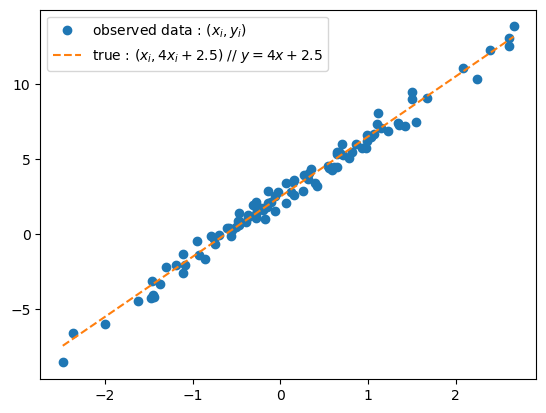

In [54]:
plt.plot(Xs, y, 'o', label = r"observed data : $(x_i, y_i)$")
plt.plot(Xs, 2.5 + 4*x, '--', label = r"true : $(x_i, 4x_i + 2.5)$ // $y = 4x + 2.5$")
plt.legend()
plt.show()

> 법칙에 의해선 주황색 선이 맞는건데, 관측한 건 오차항 때문에 점선 주변에서 관측됨
>
> 실제 주황색 선은 우리는 관측할 수가 없음. 관측된 자료에 대해서 선을 잘 그어서 true를 추정하는 수밖에 없음.

### C. 회귀분석?

`-` 관측한 자료 $(x_i,y_i)$ 가 있음 $\to$ 우리는 $(x_i,y_i)$의 관계를
파악하여 새로운 $x$가 왔을때 그것에 대한 예측값(predicted value)
$\hat{y}$을 알아내는 법칙을 알고 싶음 $\to$ 관계를 파악하기 위해서
$(x_i, y_i)$의 산점도를 그려보니 $x_i$와 $y_i$는 선형성을 가지고 있다는
것이 파악됨 $\to$ 오차항이 등분산성을 가지고 어쩌고 저쩌고… $\to$ 하여튼
$(x_i,y_i)$ 를 **“적당히 잘 관통하는”** 어떠한 하나의 추세선을 잘
추정하면 된다.

`-` 회귀분석이란 산점도를 보고 적당한 추세선을 찾는 것이다. 좀 더
정확하게 말하면 $(x_1,y_1) \dots (x_n,y_n)$ 으로
$\begin{bmatrix} \hat{w}_0 \\ \hat{w}_1 \end{bmatrix}$ 를 최대한
$\begin{bmatrix} 2.5 \\ 4 \end{bmatrix}$와 비슷하게 찾는 것.

-   given data : $\big\{(x_i,y_i) \big\}_{i=1}^{n}$

-   parameter: ${\bf W}=\begin{bmatrix} w_0 \\ w_1 \end{bmatrix}$

-   estimated parameter:
    ${\bf \hat{W}}=\begin{bmatrix} \hat{w}_0 \\ \hat{w}_1 \end{bmatrix}$

> $\begin{bmatrix} w_0 \\ w_1 \end{bmatrix}$를 잘 추정하는 것이 회귀분석.


`-` 더 쉽게 말하면 아래의 그림을 보고 **“적당한”** 추세선을 찾는 것이다.

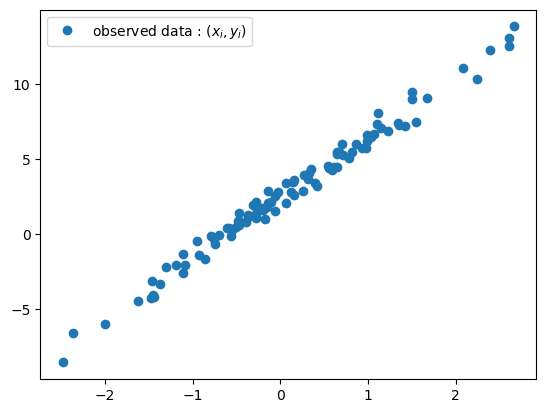

In [55]:
plt.plot(Xs, y, 'o', label = r"observed data : $(x_i, y_i)$")
plt.legend()

## 3. 손실함수

`# 예제 1` - $(\hat{w}_0,\hat{w}_1)=(-5,10)$를 선택하여 선을 그려보고 적당한지 파악해보자. 이유는 없다, 그냥 찍은거다.

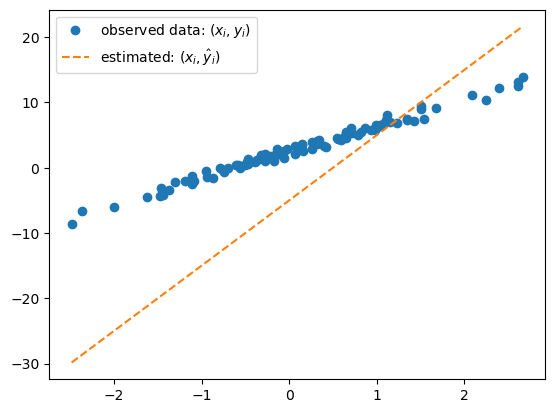

In [ ]:
plt.plot(Xs,y,'o',label=r"observed data: $(x_i,y_i)$") 
#plt.plot(x,-5+10*x,'--') ## 무지성 스칼라 연산
What = torch.tensor([[-5.0],[10.0]]) ## (2, 1)
plt.plot(Xs,X@What,'--',label=r"estimated: $(x_i,\hat{y}_i)$") ## X는 design matrix
plt.legend()

`# 예제2` – $(\hat{w}_0,\hat{w}_1)=(2.5,3.5)$을 선택하여 선을 그려보고
적당한지 판단해보자

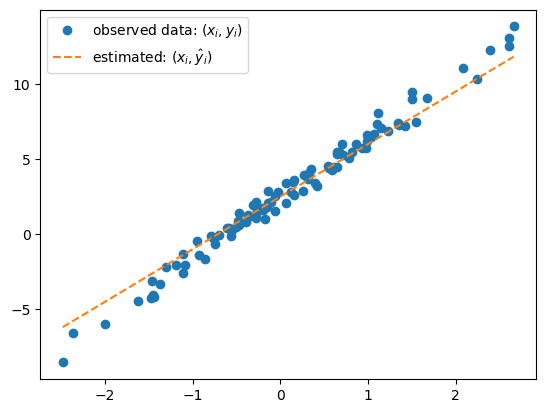

In [60]:
plt.plot(x,y,'o',label=r"observed data: $(x_i,y_i)$") 
#plt.plot(x,-5+10*x,'--')
What = torch.tensor([[2.5],[3.5]])
plt.plot(x,X@What,'--',label=r"estimated: $(x_i,\hat{y}_i)$")
plt.legend()

`# 예제3` – $(\hat{w}_0,\hat{w}_1)=(2.3,3.5)$을 선택하여 선을 그려보고
적당한지 판단해보자

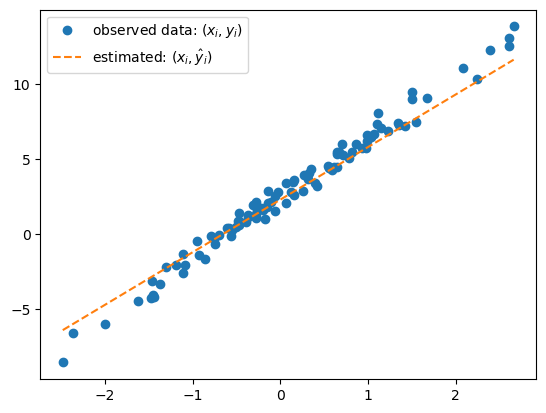

In [61]:
plt.plot(x,y,'o',label=r"observed data: $(x_i,y_i)$") 
#plt.plot(x,-5+10*x,'--')
What = torch.tensor([[2.3],[3.5]])
plt.plot(x,X@What,'--',label=r"estimated: $(x_i,\hat{y}_i)$")
plt.legend()

`# 예제4` – 예제2의 추세선과 예제3의 추세선 중 뭐가 더 적당한가?

`-` (고민) 왠지 예제2가 더 적당하다고 답해야할 것 같은데.. 육안으로
판단하기 까다롭다..

`-` 적당함을 수식화 할 수 없을까?

`-` “적당한 정도”를 판단하기 위한 장치: loss의 개념 도입

$loss = \sum_{i=1}^{n}(y_i- \hat{y}_i)^2 = \sum_{i=1}^{n}\big(y_i - (\hat{w}_0+\hat{w}_1x_i)\big)^2$ : SSE loss

$=({\bf y}-\hat{\bf y})^\top({\bf y}-\hat{\bf y})=({\bf y}-{\bf X}\hat{\bf W})^\top({\bf y}-{\bf X}\hat{\bf W})$

`-` loss의 특징

-   $y_i \approx \hat{y}_i$ 일수록 loss 값이 작음
-   $y_i \approx \hat{y}_i$ 이 되도록 $(\hat{w}_0, \hat{w}_1)$을 잘
    찍으면 loss 값이 작음
-   주황색 점선이 “적당할수록” loss 값이 작음 (그럼 우리 의도대로
    된거네?)

`-` loss를 써먹어보자.

In [64]:
## 예제 2/3에서 찍은 What값
What = torch.tensor([[2.5],[3.5]])
print(f"loss: {torch.sum((y - X@What)**2)}") ## 급수 노테이션

What = torch.tensor([[2.3],[3.5]])
print(f"loss: {torch.sum((y - X@What)**2)}")

loss: 55.074012756347656
loss: 59.3805046081543


In [ ]:
What = torch.tensor([[2.5],[3.5]])
print(f"loss: {(y - X@What).T @ (y - X@What)}") ## 벡터 노테이션

What = torch.tensor([[2.3],[3.5]])
print(f"loss: {(y - X@What).T @ (y - X@What)}")

loss: tensor([[55.0740]])
loss: tensor([[59.3805]])


In [90]:
for i in range(10) :
    What = torch.tensor([[2.5], [0.1*i + 3.5]])
    print(f"W0 = {What[1, 0]:.2f} : {float((y - X@What).T @ (y - X@What)):.4f}")

W0 = 3.50 : 55.0740
W0 = 3.60 : 44.8145
W0 = 3.70 : 36.8423
W0 = 3.80 : 31.1573
W0 = 3.90 : 27.7597
W0 = 4.00 : 26.6494
W0 = 4.10 : 27.8264
W0 = 4.20 : 31.2907
W0 = 4.30 : 37.0423
W0 = 4.40 : 45.0812


## 4. 파이토치의 반복추정

`-` **추정의 전략 (손실함수도입 + 경사하강법)**

-   1단계: 아무 점선이나 그어본다..
-   2단계: 1단계에서 그은 점선보다 더 좋은 점선으로 바꾼다.
-   3단계: 1-2단계를 반복한다.

### A. 1단계 – 최초의 점선

`-` 아무거나 그어요...

In [ ]:
What = torch.tensor([[-5.0], [10.0]], requires_grad = True) ## 그래디언트 기반 탐색 기법 사용할거임
What

tensor([[-5.],
        [10.]], requires_grad=True)

In [92]:
yhat = X@What

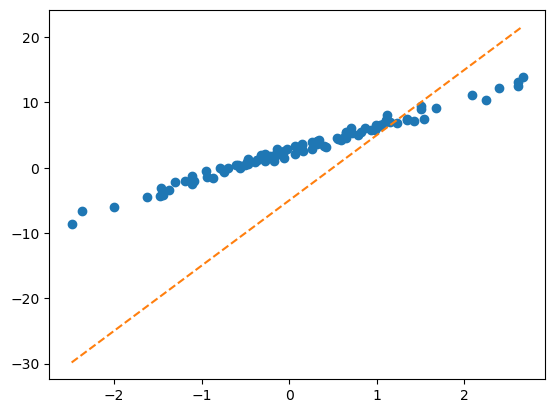

In [ ]:
plt.plot(Xs, y, 'o')
plt.plot(Xs, yhat.data, '--') ## What에 그래디언트가 달려있기 때문에 yhat에 붙어있는 미분꼬리표를 제거해줌
# plt.plot(Xs, yhat.detach(), '--')
plt.show()

### B. 2단계 - Update

`-` 적당한 정도를 판단하기 위한 장치 : loss function 도입

$$loss=\sum_{i=1}^{n}(y_i-\hat{y}_i)^2=\sum_{i=1}^{n}(y_i-(\hat{w}_0+\hat{w}_1x_i))^2=({\bf y}-{\bf\hat{y}})^\top({\bf y}-{\bf\hat{y}})=({\bf y}-{\bf X}{\bf \hat{W}})^\top({\bf y}-{\bf X}{\bf \hat{W}})$$

`-` loss 함수의 특징 : 위 그림의 주황색 점선이 '적당할 수록' loss값이 작다.

In [100]:
loss = torch.sum((y-yhat)**2)
loss

tensor(8587.6875, grad_fn=<SumBackward0>)

`-` 우리의 목표: 이 loss(=8587.6275)을 더 줄이자.

-   궁극적으로는 아예 모든 조합 $(\hat{w}_0,\hat{w}_1)$에 대하여 가장
    작은 loss를 찾으면 좋겠다.

`-` 문제의 치환: 생각해보니까 우리의 문제는 아래와 같이 수학적으로
단순화 되었다.

-   적당해보이는 주황색 선을 찾자 $\to$ $loss(\hat{w}_0,\hat{w}_1)$를
    최소로하는 $(\hat{w}_0,\hat{w}_1)$의 값을 찾자.

`-` 수정된 목표: $loss(\hat{w}_0,\hat{w}_1)$를 최소로 하는
$(\hat{w}_0,\hat{w}_1)$을 구하라.

-   단순한 수학문제가 되었다. 이것은 마치 $f(x,y)$를 최소화하는
    $(x,y)$를 찾으라는 것임.
-   함수의 최대값 혹은 최소값을 컴퓨터를 이용하여 찾는것을 “최적화”라고
    하며 이는 산공교수님들이 가장 잘하는 분야임. (산공교수님들에게
    부탁하면 잘해줌, 산공교수님들은 보통 최적화해서 어디에 쓸지보다
    최적화 자체에 더 관심을 가지고 연구하심)
-   최적화를 하는 방법? 경사하강법

---

**Gradient Descent**

> 수치적으로 최적화를 진행하는 방법... 은 아닌가?

`#` 경사하강법 아이디어 (1차원)

1.  임의의 점을 찍는다.
2.  그 점에서 순간기울기를 구한다. (접선) \<– 미분
3.  순간기울기(=미분계수)의 부호를 살펴보고 부호와 반대방향으로
    움직인다.

> 팁: 기울기의 절대값 크기와 비례하여 보폭(=움직이는 정도)을 조절한다.
> $\to$ $\alpha$를 도입

> 최종수식:
> $\hat{w} \leftarrow \hat{w} - \alpha \times \frac{\partial}{\partial \hat{w}}loss(\hat{w})$ : 업데이트 후 $\leftarrow$ 업데이트 전

> ex)
>
> $f(x) = x^2, ~ f'(x) = 2x \to f(2) = 4 \to x_2 = x_1 - 4$
>
> 4만큼 그대로 업데이트하면 평생 안끝남... 적당한 $\alpha$를 선택하여 기울기의 반영 정도를 선택할 필요가 있음.

`#`

`#` 경사하강법 아이디어 (2차원)

![](https://guebin.github.io/DL2024/posts/02wk-1_files/figure-html/cell-37-output-1.png)

1.  임의의 점을 찍는다.
2.  그 점에서 순간기울기를 구한다. (접평면) \<– 편미분
3.  순간기울기(=미분계수)의 부호를 살펴보고 부호와 반대방향으로 각각
    움직인다. : 그래디언트 벡터 반대방향

> 팁: 여기서도 기울기의 절대값 크기와 비례하여 보폭(=움직이는 정도)을
> 각각 조절한다. $\to$ $\alpha$를 도입.

`#`

`-` 경사하강법 = **loss를 줄이도록 ${\bf \hat{W}}$를 개선하는 방법**

-   업데이트 공식: 수정값 = 원래값 - $\alpha$ $\times$
    기울어진크기(=미분계수)
-   여기에서 $\alpha$는 전체적인 보폭의 크기를 결정한다. 즉 $\alpha$값이
    클수록 한번의 update에 움직이는 양이 크다.

`-` 발상의 전환: 가만히 보니까 loss는
$\hat{\bf W} =\begin{bmatrix} \hat{w}_0 \\ \hat{w}_1 \end{bmatrix}$ 에
따라서 값이 바뀌는 함수잖아??? 즉 아래와 같이 생각할 수 있음.

$$ loss(\hat{w}_0,\hat{w}_1) := loss(\hat{\bf W})=\sum_{i=1}^{n}(y_i-(\hat{w}_0+\hat{w}_1x_i))^2=({\bf y}-{\bf X}{\bf \hat{W}})^\top({\bf y}-{\bf X}{\bf \hat{W}})$$

따라서 구하고 싶은것은 아래와 같음

$$\hat{\bf W}^{LSE} = \underset{\bf \hat{W}}{\operatorname{argmin}} ~ loss(\hat{\bf W})$$

> 위의 식은
> $\hat{\bf W} = \underset{\bf W}{\operatorname{argmin}} ~ loss({\bf W})$
> 로 생각해도 무방

`# 경사하강법` – $loss({\bf W})$를 최소로 만드는 ${\bf W}$를 컴퓨터로
구하는 방법, 즉
$\hat{\bf W} := \underset{\bf W}{\operatorname{argmin}} ~ loss({\bf W})$를
구하는 방법을 요약하면 아래와 같다.

`1`. 임의의 점 $\hat{\bf W}$를 찍는다.

`2`. 그 점에서 순간기울기를 구한다. 즉
$\frac{\partial}{\partial {\bf W}}loss({\bf W})$ 를 계산한다.

`3`. $\hat{\bf W}$에서의 순간기울기[1]의 부호를 살펴보고 부호와
반대방향으로 움직인다. 이때 기울기의 절대값 크기[2]와 비례하여
보폭(=움직이는 정도)을 각각 조절한다. 즉 아래의 수식에 따라 업데이트
한다.

$$\hat{\bf W} \leftarrow \hat{\bf W} - \alpha \times \frac{\partial}{\partial {\bf W}}loss({\bf W})$$

> $\hat{\bf{W}} \leftarrow \hat{\bf{W}} - \alpha \times \begin{bmatrix} \frac{\partial}{\partial w_0} \\ \frac{\partial}{\partial w_1} \end{bmatrix} loss(\bf W)$

`#`

`-` 여기에서 미분을 어떻게…?? 즉 아래를 어떻게 계산해..?

$$\frac{\partial}{\partial {\bf W}}loss({\bf W}):= \begin{bmatrix} \frac{\partial}{\partial w_0} \\ \frac{\partial}{\partial w_1}\end{bmatrix}loss({\bf W}) =  \begin{bmatrix} \frac{\partial}{\partial w_0}loss({\bf W}) \\ \frac{\partial}{\partial w_1}loss({\bf W})\end{bmatrix} $$

> `loss.backward()`를 실행하면 `What.grad`에 미분값이 업데이트 되어요!

(실행전)

[1] $\frac{\partial}{\partial {\bf W}}loss({\bf W})$

[2] $\left|\frac{\partial}{\partial {\bf W}}loss({\bf W})\right|$